## Utilize o dataset de crimes dispnibilizado e métodos de clusterização para segmentar a cidade em função de regiões onde ocorrem crimes.

### 1 - Aplique o algoritmo DBSCAN para identificar regiões com grande densidade de crimes.

#### a) Utilize os atributos de latitude e longitude na clusterização.

#### b) Utilize como métrica a distância de haversine (impementação do scikit learn)

#### c) Varie o eps e o minPts. Para o eps, considere ter como base de valor informações estatísticas da distância entre os pontos, como a média, mediana ou o primeiro quartil.

#### d) Plote os pontos usando o Folium.

### 2) Compare os resultados do DBSCAN com uma clusterização baseada no K-Means, utilize o número de clusters encontrados no DBSCAN. Plote os resultados.

#### O que você pode observar de diferença entre os métodos?

### 3) Faça o mesmo para clusterização hierárquica.

### Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

### Importando dataset

In [72]:
df = pd.read_csv('Cluster-Crime-Maio.csv')
df.head()

,ID,FONTE,FLAGRANTE,NATUREZA DA OCORRÊNCIA,HISTÓRICO DA OCORRÊNCIA,LOCAL:,BAIRRO,SUSPEITO:,VEÍCULO:,VÍTIMA:,...,MATERIAL APREENDIDO:,PLACA:,VÍTIMAS LESIONADAS:,SUSPEITOS:,HORA,MINUTO,DATA,LATITUDE,LONGITUDE,CLUSTER
0,1,CIOPS,NÃO,MORTE - A BALA,"LOCAL: RUA CODO, JANGURUSSU. VÍTIMA: TIAGO S.P...","RUA CODO, JANGURUSSU",JANGURUSSU,nulo,nulo,TIAGO S,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,10,37,01/05/17,-3.850046,-38.522390,30
1,2,CIOPS,NÃO,MORTE A BALA,"LOCAL: AV. LESTE OESTE, PIRAMBU. VÍTIMA: RAFAE...","AV. LESTE OESTE, PIRAMBU",PIRAMBU,nulo,nulo,RAFAEL RS,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,11,50,01/05/17,-3.712388,-38.553322,0
2,3,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA TAILANDIA, GENIBAÚ. VÍTIMA: ISRAEL ...","RUA TAILANDIA, GENIBAU",GENIBAU,nulo,nulo,ISRAEL RA,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,13,53,01/05/17,-3.758621,-38.604318,1
3,4,CIOPS,NÃO,MORTE A BALA,LOCAL: RUA DR JOAQUIM FROTA SAPIRANGA COITÉ. V...,RUA DR JOAQUIM FROTA SAPIRANGA COITE,RUA DR JOAQUIM FROTA SAPIRANGA COITE,nulo,nulo,DAVI M,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,15,14,01/05/17,-3.801281,-38.472957,-1
4,5,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA CARNAUBAL, ALVARO WEYNE. VÍTIMA: DI...","RUA CARNAUBAL, ALVARO WEYNE",ALVARO WEYNE,nulo,nulo,DIEGO T,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,17,42,01/05/17,-3.722553,-38.582816,2


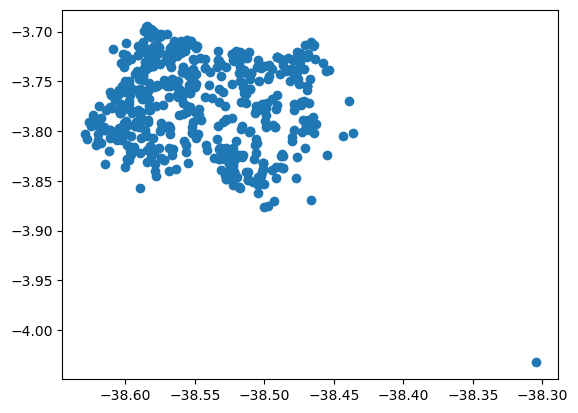

In [73]:
lat_long = df[['LATITUDE', 'LONGITUDE']]
lat, longg = df.LATITUDE, df.LONGITUDE

plt.scatter(longg, lat)

In [74]:
from sklearn.cluster import DBSCAN

X = lat_long.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [75]:
df['CLUSTER'].value_counts()

-1     220
 4      41
 5      24
 2      20
 0      17
 16     16
 1      15
 3      15
 11     14
 6      12
 19     11
 14     11
 9      11
 12     11
 8      10
 15     10
 23     10
 20      9
 18      9
 13      8
 27      8
 17      8
 21      6
 7       6
 31      5
 24      5
 26      5
 30      5
 22      5
 25      5
 10      5
 29      5
 28      5
Name: CLUSTER, dtype: int64

In [76]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color=df['CLUSTER'])

fig.show()

In [77]:
from sklearn.metrics import silhouette_score as ss

ss(X, df['CLUSTER'])

0.04156059693318442

In [78]:
from sklearn.metrics.pairwise import haversine_distances
dist_matrix = haversine_distances(X)
dist_matrix

array([[0.        , 0.13986783, 0.11189602, ..., 0.13770439, 0.11912255,
        0.10563676],
       [0.13986783, 0.        , 0.06263259, ..., 0.01123828, 0.04456047,
        0.03717673],
       [0.11189602, 0.06263259, 0.        , ..., 0.05269391, 0.0182239 ,
        0.06161447],
       ...,
       [0.13770439, 0.01123828, 0.05269391, ..., 0.        , 0.03447425,
        0.04002689],
       [0.11912255, 0.04456047, 0.0182239 , ..., 0.03447425, 0.        ,
        0.04934686],
       [0.10563676, 0.03717673, 0.06161447, ..., 0.04002689, 0.04934686,
        0.        ]])

In [79]:
# Calculando a média das distâncias
mean_distance = np.mean(dist_matrix)

# Calculando a mediana das distâncias
median_distance = np.median(dist_matrix)

# Calculando o primeiro quartil das distâncias
first_quartile = np.percentile(dist_matrix, 25)

print("Média das distâncias:", mean_distance)
print("Mediana das distâncias:", median_distance)
print("Primeiro quartil das distâncias:", first_quartile)

Média das distâncias: 0.07236409670505739
Mediana das distâncias: 0.07111575869065587
Primeiro quartil das distâncias: 0.0439481019704619


In [80]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [81]:
min_samples = np.arange(2, 50, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47])

In [82]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
N

240

In [83]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

In [84]:
best_dict = get_scores_and_labels(combinations, X)

Index: 0, Score: 0.005491572165147194, Labels: [ 0  1  1  2  1  1  1  1  0  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1
  0  1  0  1  0  1  1  1  1  1  0  0  1  0  1  2  3  1  1  1  0  1  1  1
  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  0
  1  1  2  1  0  1  1  0  1  1  1  1  1  0  1  2  1  1  1  1  1  1  0  0
  1  1  0  1  1  0  1  1  0  1  1  1  2  1  1  1  1  4  0  1  1  1  1  1
  1  1  0  1  1  1  1  2  0  0  0  5  0  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  3  0  1  1  1  1  1 -1  6  1  1  1
  2  0  1  1  0  1  7  1  1  1  1  0  1  1  0  0  1  1  1  1  1  1  1  0
  2  1  1  1  0  1  0  1  1  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1
  1  1  0  1  1  1 -1  4  4  0  1  1  1  0  0  1  1  1  2  2  1  1  1  1
  1  0  1  1  1  1  1  1  1  3  0  1  1  1  1  0  1  1  1  1  1  1  1  1
  1  0  1  1  2  1  1  1  1  1  1  1  0  1  7  1  1  1  2  0  1  0  1  1
  0 

Combination (0.08071428571428571, 26) on iteration 25 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 29) on iteration 26 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 32) on iteration 27 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 35) on iteration 28 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 38) on iteration 29 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 41) on iteration 30 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 44) on iteration 31 of 240 has 1 clusters. Moving on
Combination (0.08071428571428571, 47) on iteration 32 of 240 has 1 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration 33 of 240 has 1 clusters. Moving on
Combination (0.15142857142857144, 5) on iteration 34 of 240 has 1 clusters. Moving on
Combination (0.15142857142857144, 8) on iteration 35 of 240 has 1 clusters. Moving on
Combination (0.15142857142857144, 11) on itera

Combination (0.6464285714285715, 26) on iteration 153 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 29) on iteration 154 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 32) on iteration 155 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 35) on iteration 156 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 38) on iteration 157 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 41) on iteration 158 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 44) on iteration 159 of 240 has 1 clusters. Moving on
Combination (0.6464285714285715, 47) on iteration 160 of 240 has 1 clusters. Moving on
Combination (0.7171428571428572, 2) on iteration 161 of 240 has 1 clusters. Moving on
Combination (0.7171428571428572, 5) on iteration 162 of 240 has 1 clusters. Moving on
Combination (0.7171428571428572, 8) on iteration 163 of 240 has 1 clusters. Moving on
Combination (0.7171428571428572, 11) on iterat

In [85]:
best_dict

{'best_epsilon': 0.01,
 'best_min_samples': 8,
 'best_labels': array([ 0,  1,  1,  2,  1,  1,  3,  1,  0,  1,  1,  1,  1, -1,  3,  1, -1,
         3, -1, -1,  4,  4,  5,  0,  1,  3,  1,  3,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  4,  0,  4,  3,  1,  1,  1,  5,  1,  1,  0,  1,  0,
         1,  0, -1,  1,  1,  1, -1,  0,  0,  5,  0,  1,  2, -1,  1,  3,  1,
         0, -1,  3,  1,  1,  1,  1,  1,  1, -1,  1,  2,  1,  1,  1,  1,  4,
         1,  1,  5,  1,  3,  0,  1,  0, -1,  3,  0,  1,  1,  2,  4,  0,  1,
         1,  0,  1,  1,  1,  1,  1,  0,  3,  2,  3,  1,  1,  3,  1,  1, -1,
         0,  1,  1,  0,  1,  1,  0,  1,  4,  0,  1,  1,  1,  2,  3,  1,  1,
         1, -1,  0, -1,  3,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  2,  0,
         0,  0, -1,  0,  4,  1,  3,  1, -1,  1,  3, -1,  1,  1,  1,  1,  3,
        -1,  1,  1,  1,  1,  1,  1,  3,  1,  1, -1, -1,  1,  3,  1,  1,  1,
        -1, -1,  1,  3,  1,  2,  0,  1,  1,  0,  1, -1, -1,  1,  1,  1,  0,
         1,  1,  0,  0,  1

In [86]:
df['CLUSTER'] = best_dict['best_labels']

df['CLUSTER'].value_counts()

 1    299
 0     77
-1     71
 3     48
 4     36
 2     19
 5     17
Name: CLUSTER, dtype: int64

In [87]:
fig = px.scatter(x=longg, y=lat, color=df['CLUSTER'])
fig.show()

In [52]:
df

,ID,FONTE,FLAGRANTE,NATUREZA DA OCORRÊNCIA,HISTÓRICO DA OCORRÊNCIA,LOCAL:,BAIRRO,SUSPEITO:,VEÍCULO:,VÍTIMA:,...,MATERIAL APREENDIDO:,PLACA:,VÍTIMAS LESIONADAS:,SUSPEITOS:,HORA,MINUTO,DATA,LATITUDE,LONGITUDE,CLUSTER
0,1,CIOPS,NÃO,MORTE - A BALA,"LOCAL: RUA CODO, JANGURUSSU. VÍTIMA: TIAGO S.P...","RUA CODO, JANGURUSSU",JANGURUSSU,nulo,nulo,TIAGO S,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,10,37,01/05/17,-3.850046,-38.522390,0
1,2,CIOPS,NÃO,MORTE A BALA,"LOCAL: AV. LESTE OESTE, PIRAMBU. VÍTIMA: RAFAE...","AV. LESTE OESTE, PIRAMBU",PIRAMBU,nulo,nulo,RAFAEL RS,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,11,50,01/05/17,-3.712388,-38.553322,1
2,3,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA TAILANDIA, GENIBAÚ. VÍTIMA: ISRAEL ...","RUA TAILANDIA, GENIBAU",GENIBAU,nulo,nulo,ISRAEL RA,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,13,53,01/05/17,-3.758621,-38.604318,1
3,4,CIOPS,NÃO,MORTE A BALA,LOCAL: RUA DR JOAQUIM FROTA SAPIRANGA COITÉ. V...,RUA DR JOAQUIM FROTA SAPIRANGA COITE,RUA DR JOAQUIM FROTA SAPIRANGA COITE,nulo,nulo,DAVI M,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,15,14,01/05/17,-3.801281,-38.472957,1
4,5,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA CARNAUBAL, ALVARO WEYNE. VÍTIMA: DI...","RUA CARNAUBAL, ALVARO WEYNE",ALVARO WEYNE,nulo,nulo,DIEGO T,...,nulo,nulo,nulo,NÃO IDENTIFICADOS,17,42,01/05/17,-3.722553,-38.582816,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,563,CIOPS,NÃO,VEICULO LOCALIZADO,"LOCAL: RUA SABINO FILHO, 12, SIQUEIRA. VEÍCULO...","RUA SABINO FILHO, 12, SIQUEIRA","12, SIQUEIRA",nulo,"CG 125 FAN KS, VERMELHA, 2012, OHX7263-CE",nulo,...,nulo,nulo,nulo,nulo,13,43,31/05/17,-3.814085,-38.620876,1
563,564,CIOPS,NÃO,VEICULO LOCALIZADO,"LOCAL: RUA AUGUSTO JAIME BENEVIDES, GUARARAPE...","RUA AUGUSTO JAIME BENEVIDES, GUARARAPES",GUARARAPES,nulo,HB20S 1,nulo,...,nulo,nulo,nulo,nulo,15,40,31/05/17,-3.763434,-38.491059,1
564,565,CIOPS,NÃO,VEICULO LOCALIZADO,"LOCAL: AV. DOUTOR THEGERGE, BARRA DO CEARÁ. V...","AV. DOUTOR THEGERGE, BARRA DO CEARA",BARRA DO CEARA,nulo,"CG150 FAN, PRETA, 2014, OST9220-CE",nulo,...,nulo,nulo,nulo,nulo,18,38,31/05/17,-3.716754,-38.565645,1
565,566,CIOPS,NÃO,VEICULO LOCALIZADO,"LOCAL: RUA PEDRO MELO, ANTÔNIO BEZERRA. VEÍCU...","RUA PEDRO MELO, ANTONIO BEZERRA",ANTONIO BEZERRA,nulo,"CHEVETTE, VERDE, 1984/1984, HUP7731-CE",nulo,...,nulo,nulo,nulo,nulo,18,39,31/05/17,-3.744029,-38.591001,1
